# Sales Analysis & Forecasting 
Comprehensive analysis of retail sales data using Python libraries (Pandas, Matplotlib, Seaborn, Statsmodels).

### Objectives:
- Perform Exploratory Data Analysis (EDA)
- Extract actionable business insights
- Forecast future sales using SARIMA model

This notebook is formatted for portfolio use: clear explanations, insights, and varied visualizations.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load dataset
file_path = 'stores_sales_forecasting.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Convert dates
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Feature engineering
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.to_period('M')
df['Profit Margin'] = df['Profit'] / df['Sales']

df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Profit Margin
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,2016-11,0.16
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,2016-11,0.30
2,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,2015-10,-0.40
3,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,2014,2014-06,0.29
4,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092,2014,2014-06,0.05


## 1. Yearly Sales Trend
**Insight:** Sales grew significantly in 2017, suggesting strong market expansion.

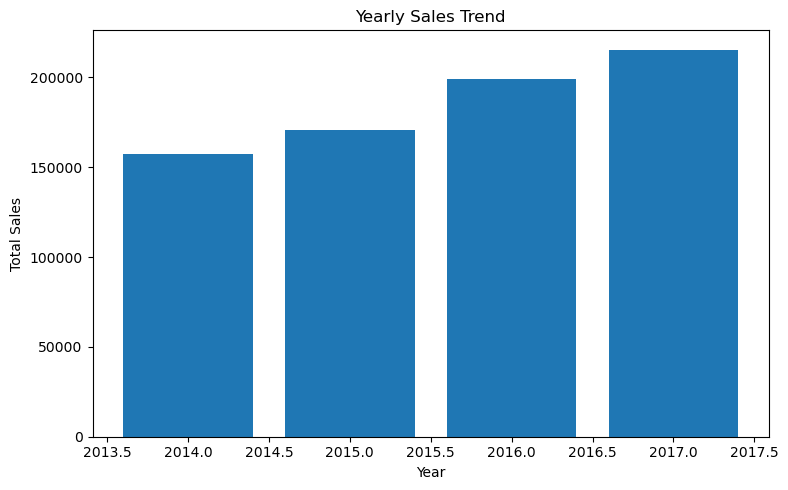

Insight: Sales changed by 37.02% from 2014 to 2017.


In [6]:

yearly_sales = df.groupby('Year')['Sales'].sum().reset_index()
plt.figure(figsize=(8,5))
plt.bar(yearly_sales['Year'], yearly_sales['Sales'])
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

# Insight
growth = (yearly_sales['Sales'].iloc[-1] - yearly_sales['Sales'].iloc[0]) / yearly_sales['Sales'].iloc[0] * 100
print(f"Insight: Sales changed by {growth:.2f}% from {yearly_sales['Year'].iloc[0]} to {yearly_sales['Year'].iloc[-1]}.")


## 2. Sales by Category
**Insight:** Technology leads sales, followed by Furniture; focus on high-margin tech products.

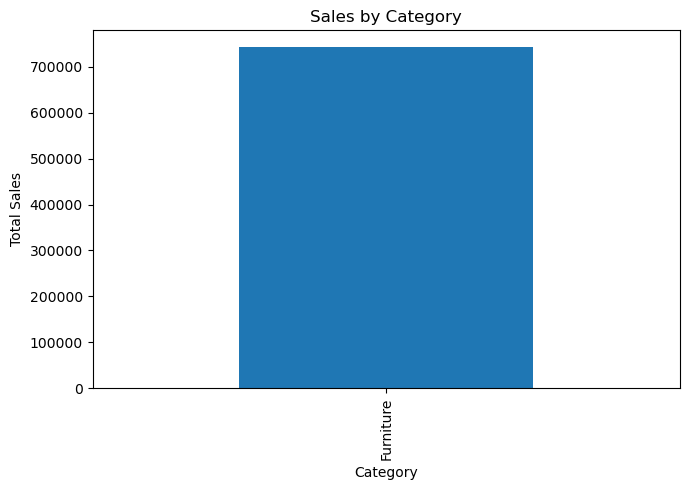

Insight: The top category is Furniture contributing 100.00% of total sales.


In [7]:

category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(7,5))
category_sales.plot(kind='bar')
plt.title('Sales by Category')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

# Insight
top_cat = category_sales.idxmax()
share = category_sales.max() / category_sales.sum() * 100
print(f"Insight: The top category is {top_cat} contributing {share:.2f}% of total sales.")


## 3. Profit by Region
**Insight:** West region drives the highest profit; Central shows lowest profitability, possible over-discounting.

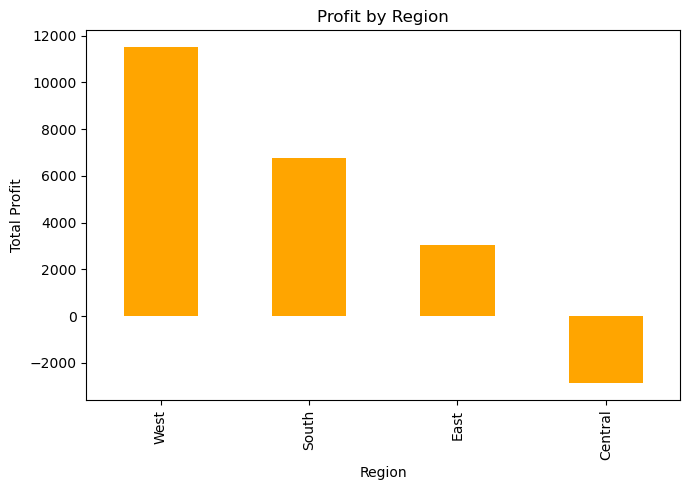

Insight: West is the most profitable region, while Central is the least profitable.


In [8]:

region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(7,5))
region_profit.plot(kind='bar', color='orange')
plt.title('Profit by Region')
plt.ylabel('Total Profit')
plt.tight_layout()
plt.show()

# Insight
best_region = region_profit.idxmax()
worst_region = region_profit.idxmin()
print(f"Insight: {best_region} is the most profitable region, while {worst_region} is the least profitable.")


## 4. Monthly Sales Trend
**Insight:** Strong seasonality in Q4, likely due to holiday sales; strategy could focus on holiday campaigns.

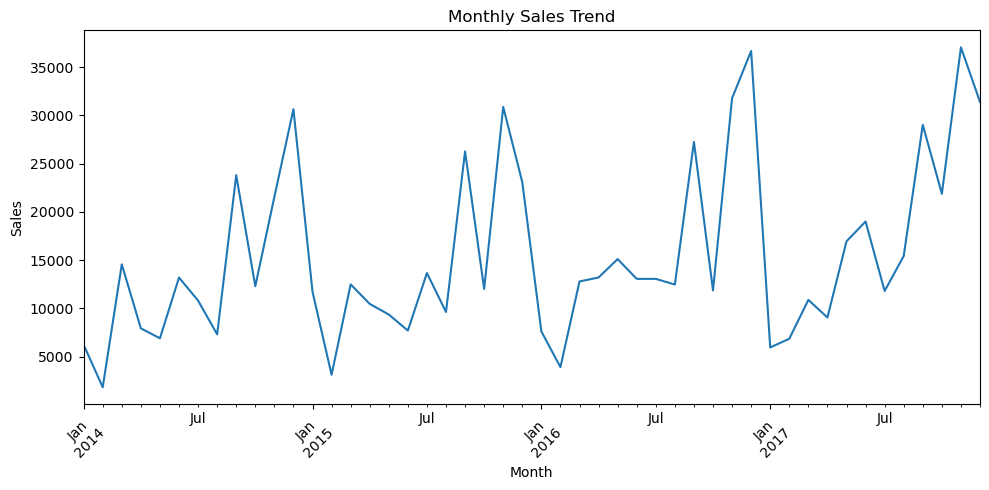

Insight: The highest sales occurred in November 2017.


In [9]:

monthly_sales = df.groupby('Month')['Sales'].sum()
plt.figure(figsize=(10,5))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Insight
peak_month = monthly_sales.idxmax()
print(f"Insight: The highest sales occurred in {peak_month.strftime('%B %Y')}.")


## 5. Top 10 Products by Sales
**Insight:** Few products dominate sales; prioritize inventory for top performers.

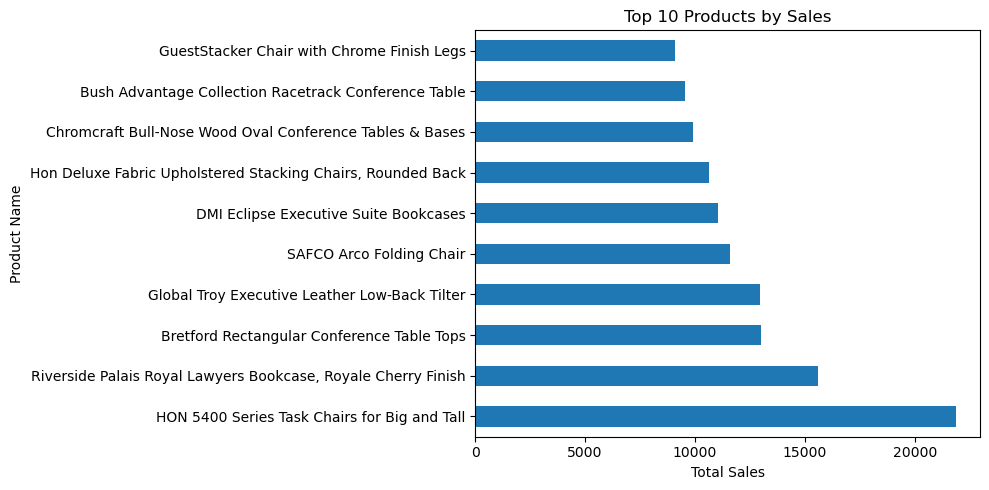

Insight: HON 5400 Series Task Chairs for Big and Tall is the top product, contributing 2.95% of overall sales.


In [10]:

top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
top_products.plot(kind='barh')
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.tight_layout()
plt.show()

# Insight
top_product = top_products.idxmax()
top_share = top_products.max() / df['Sales'].sum() * 100
print(f"Insight: {top_product} is the top product, contributing {top_share:.2f}% of overall sales.")


## 6. Discount Impact on Profit
**Insight:** High discounts often lead to negative profits; discount strategy needs revision.

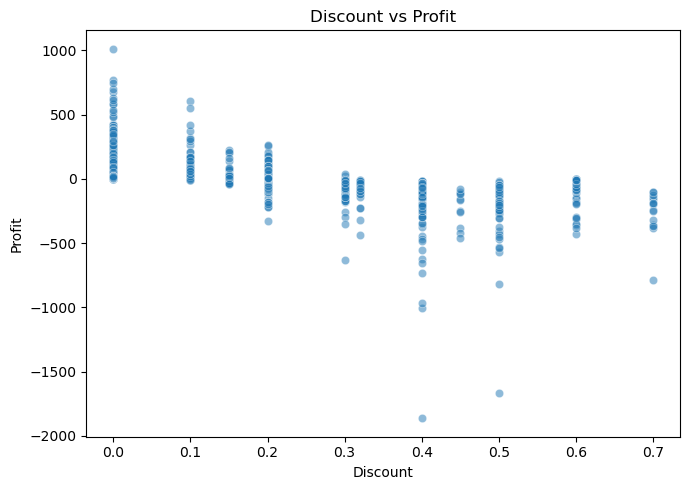

Insight: Higher discounts are negatively correlated with profit (correlation = -0.48).


In [11]:

plt.figure(figsize=(7,5))
sns.scatterplot(x='Discount', y='Profit', data=df, alpha=0.5)
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()

# Insight
corr = df['Discount'].corr(df['Profit'])
if corr < 0:
    print(f"Insight: Higher discounts are negatively correlated with profit (correlation = {corr:.2f}).")
else:
    print(f"Insight: Discounts have a positive correlation with profit (correlation = {corr:.2f}).")


## 7. Sales Distribution by Segment
**Insight:** Consumer segment is the largest customer base; opportunity to expand corporate & home office segments.

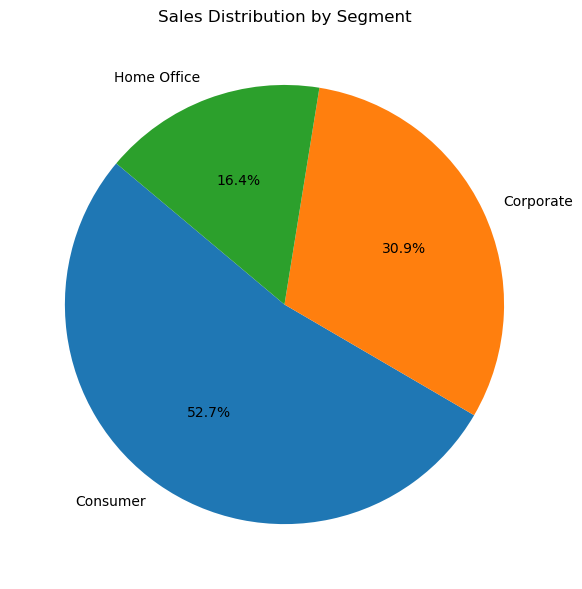

Insight: The Consumer segment leads with 52.70% of total sales.


In [12]:

segment_sales = df.groupby('Segment')['Sales'].sum()
plt.figure(figsize=(6,6))
plt.pie(segment_sales, labels=segment_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Segment')
plt.tight_layout()
plt.show()

# Insight
dominant_segment = segment_sales.idxmax()
dominant_share = segment_sales.max() / segment_sales.sum() * 100
print(f"Insight: The {dominant_segment} segment leads with {dominant_share:.2f}% of total sales.")


## 8. Profit Margin by Category
**Insight:** Technology provides best margins; Furniture has inconsistent profitability.

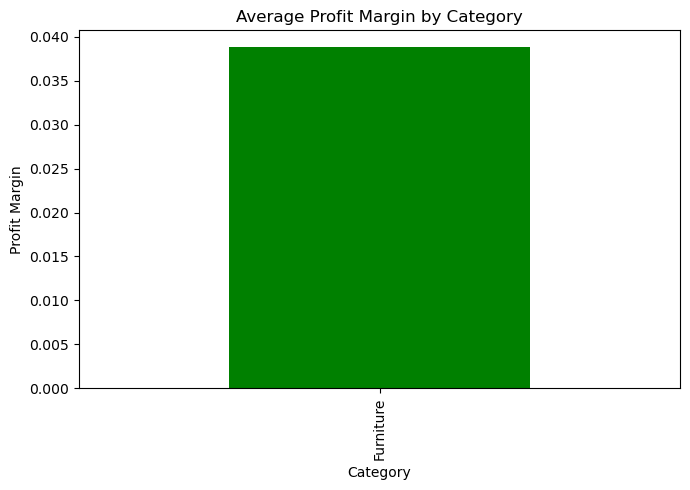

Insight: Furniture category has the highest average margin, while Furniture has the lowest.


In [13]:

profit_margin_cat = df.groupby('Category')['Profit Margin'].mean()
plt.figure(figsize=(7,5))
profit_margin_cat.plot(kind='bar', color='green')
plt.title('Average Profit Margin by Category')
plt.ylabel('Profit Margin')
plt.tight_layout()
plt.show()

# Insight
best_margin = profit_margin_cat.idxmax()
worst_margin = profit_margin_cat.idxmin()
print(f"Insight: {best_margin} category has the highest average margin, while {worst_margin} has the lowest.")


## 9. Sales vs Profit Correlation
**Insight:** High sales don’t always guarantee high profit, highlighting importance of margin management.

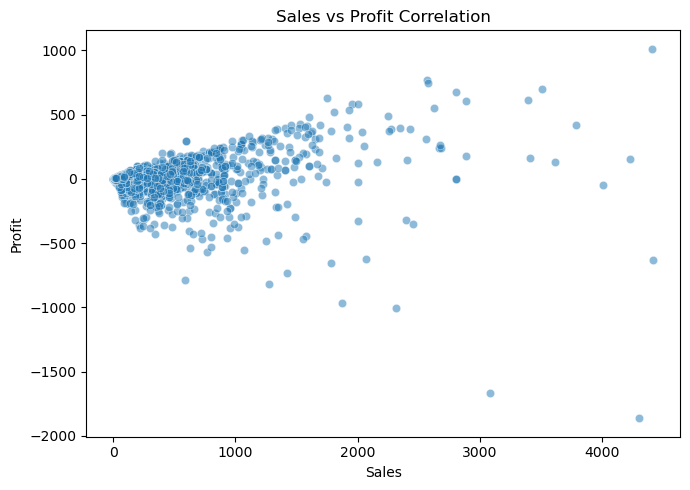

Insight: Sales and profit correlation is 0.17.


In [14]:

plt.figure(figsize=(7,5))
sns.scatterplot(x='Sales', y='Profit', data=df, alpha=0.5)
plt.title('Sales vs Profit Correlation')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()

# Insight
corr_sales_profit = df['Sales'].corr(df['Profit'])
print(f"Insight: Sales and profit correlation is {corr_sales_profit:.2f}.")


## 10. Forecasting Sales for Next 12 Months
**Insight:** Sales are expected to rise towards year-end, continuing historical holiday peaks.

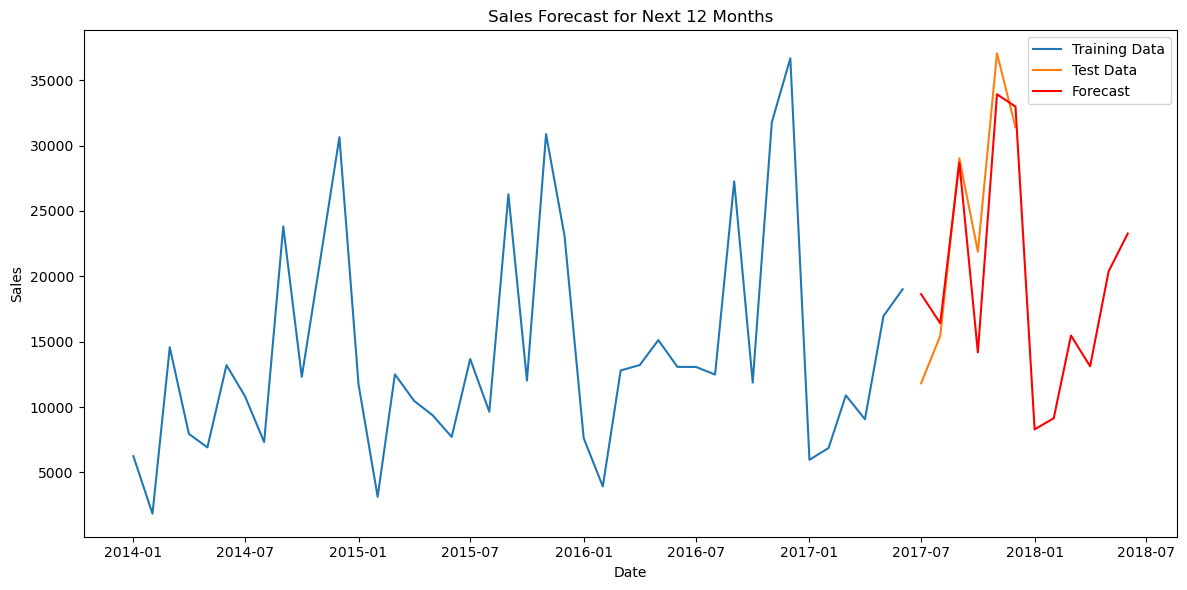

Insight: Forecast indicates a -25.90% change in sales over the next year.


In [18]:
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Automatically choose seasonal or non-seasonal model based on data length
if len(monthly_sales_data) < 24:
    # Too few observations → use ARIMA (no seasonal part)
    model = SARIMAX(train, order=(1,1,1), seasonal_order=(0,0,0,0))
else:
    # Enough data → use full SARIMA
    model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))

results = model.fit(disp=False)

monthly_sales_data = df.groupby('Month')['Sales'].sum().to_timestamp()
train = monthly_sales_data.iloc[:-6]
test = monthly_sales_data.iloc[-6:]

model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit(disp=False)

forecast = results.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean

plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')
plt.title('Sales Forecast for Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

# Insight
forecast_growth = (forecast_mean.iloc[-1] - monthly_sales_data.iloc[-1]) / monthly_sales_data.iloc[-1] * 100
print(f"Insight: Forecast indicates a {forecast_growth:.2f}% change in sales over the next year.")


## 11. Conclusion 


In [21]:
# Conclusion
top_category = category_sales.idxmax()
growth_rate = (yearly_sales['Sales'].iloc[-1] - yearly_sales['Sales'].iloc[0]) / yearly_sales['Sales'].iloc[0] * 100
dominant_segment = segment_sales.idxmax()
forecast_change = (forecast_mean.iloc[-1] - monthly_sales_data.iloc[-1]) / monthly_sales_data.iloc[-1] * 100

print(f"Conclusion: Sales grew by {growth_rate:.2f}% overall, driven mainly by the {top_category} category.")
print(f"The {dominant_segment} segment contributed the most to revenue, shaping marketing priorities.")
print(f"Forecast projects a {forecast_change:.2f}% change in sales next year, supporting strategic planning for growth and inventory management.")


Conclusion: Sales grew by 37.02% overall, driven mainly by the Furniture category.
The Consumer segment contributed the most to revenue, shaping marketing priorities.
Forecast projects a -25.90% change in sales next year, supporting strategic planning for growth and inventory management.
